VGG16

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Bidirectional, LSTM, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

input_shape = (224, 224, 3)

# Define the model
model = Sequential()

# Load the VGG16 base model with pre-trained ImageNet weights
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in base_model.layers[:-8]:  # Freeze more layers for fine-tuning
    layer.trainable = False
model.add(base_model)

# Add GlobalAveragePooling2D to reduce dimensions
model.add(GlobalAveragePooling2D())

# Reshape the output to add a time dimension
model.add(tf.keras.layers.Reshape((1, 512)))

# Add a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128)))

# Add a Batch Normalization layer
model.add(BatchNormalization())

# Add Dense layers with Dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Add the final output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model with a learning rate scheduler
initial_learning_rate = 1e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Train the model with early stopping and learning rate reduction on plateau
history = model.fit(train_generator,epochs=35,validation_data=validation_generator)




Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/35


79/79 [==============================] - 1328s 17s/step - loss: 0.5770 - accuracy: 0.6880 - val_loss: 0.6574 - val_accuracy: 0.6900
Epoch 2/35
79/79 [==============================] - 1043s 13s/step - loss: 0.4763 - accuracy: 0.7779 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 3/35
79/79 [==============================] - 1042s 13s/step - loss: 0.4261 - accuracy: 0.8147 - val_loss: 0.6291 - val_accuracy: 0.6050
Epoch 4/35
79/79 [==============================] - 959s 12s/step - loss: 0.3833 - accuracy: 0.8460 - val_loss: 0.5572 - val_accuracy: 0.7700
Epoch 5/35
79/79 [==============================] - 987s 13s/step - loss: 0.3375 - accuracy: 0.8702 - val_loss: 0.5317 - val_accuracy: 0.7750
Epoch 6/35
79/79 [==============================] - 1022s 13s/step - loss: 0.2906 - accuracy: 0.8923 - val_loss: 0.7978 - val_accuracy: 0.5800
Epoch 7/35
79/79 [==============================] - 1068

In [2]:
# Evaluate the model on the validation data
test_loss, accuracy = model.evaluate(train_generator)
print('Accuracy:', accuracy)

79/79 [==============================] - 613s 8s/step - loss: 0.4690 - accuracy: 0.8369
Accuracy: 0.8368963003158569


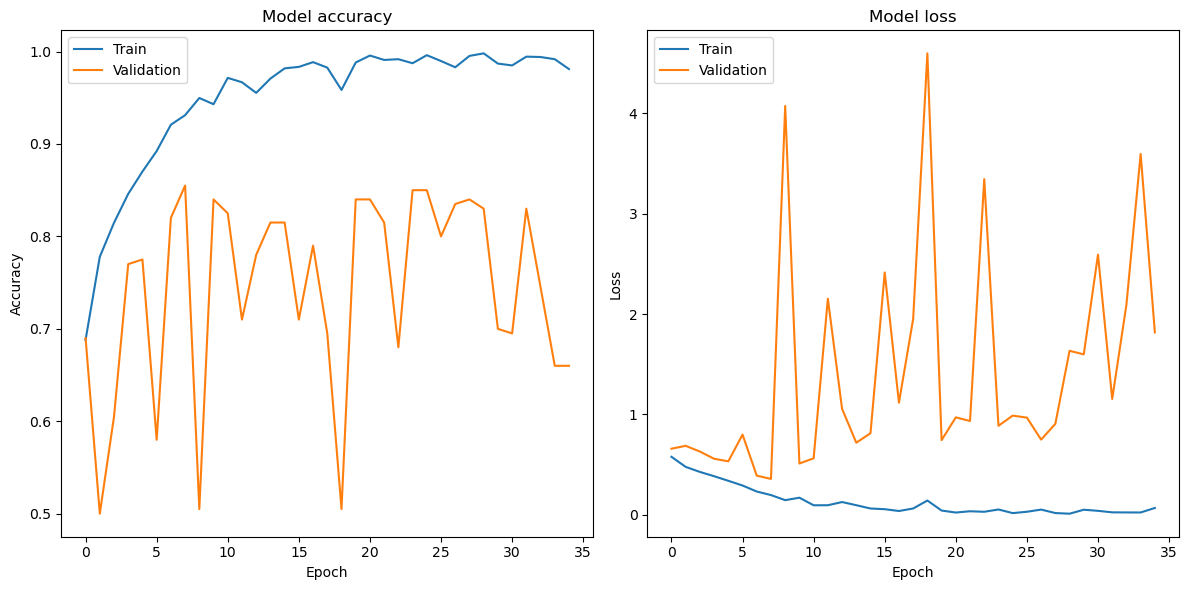

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

END